**Set data path**

In [1]:
path = "measurements/Participant_test1/"

## Start postprocessing

- `isoforce_iso` contains the data recorded with the Isoforce
- `isoforce_py_raw` contains the Isoforce data recorded with the Python script
- `sciospec_EIT_raw` contains the EIT data recorded with the EIT device

In [2]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

from src.postprocessing import (
    IsoforceIso,
    ProcessingDir,
    process_sciospec_eit,
    renderDF,
)

In [3]:
part_path = ProcessingDir(path)

Fund participant data:

Head directory: self.path='measurements/Participant_test1/'
Raw Isoforce data measured by Isoforce:
	self.isoforce_iso='measurements/Participant_test1/Test_1_JO_raw_data_10012025154959.txt'
Raw Isoforce data measured by Python:
	self.isoforce_py_raw='measurements/Participant_test1/Isokinetic_raw/'
Raw sciospec EIT data:
	self.sciospec_EIT_raw='measurements/Participant_test1/EIT_raw/'
Raw sciospec EIT samples:
	self.EIT_samples_raw='measurements/Participant_test1/EIT_raw/20250113 09.24.18/setup/'
Preprocessed sciospec EIT samples:
	self.s_path_eit='measurements/Participant_test1/EIT_processed/'


In [4]:
DF = renderDF(part_path.isoforce_iso)

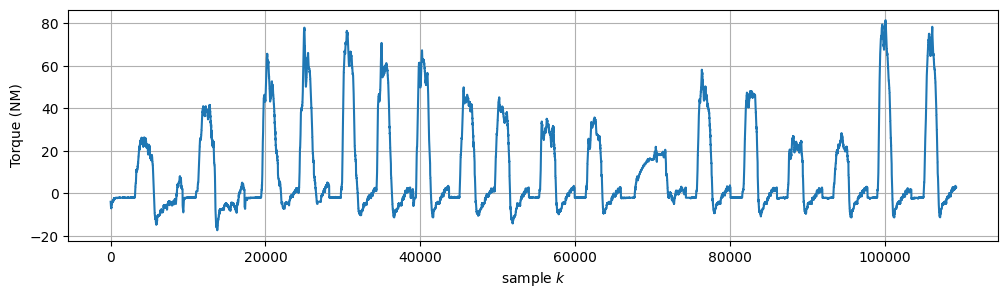

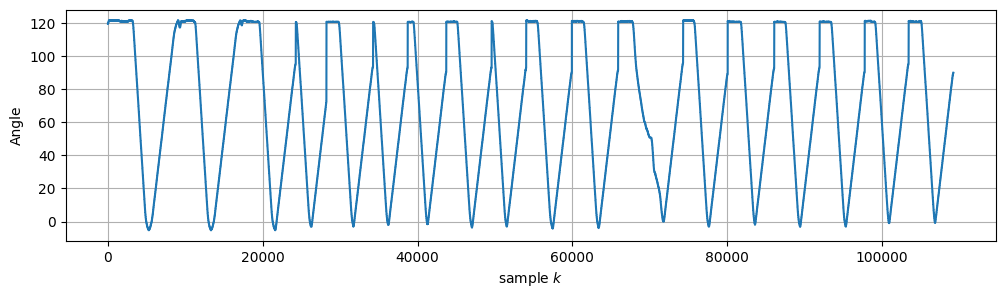

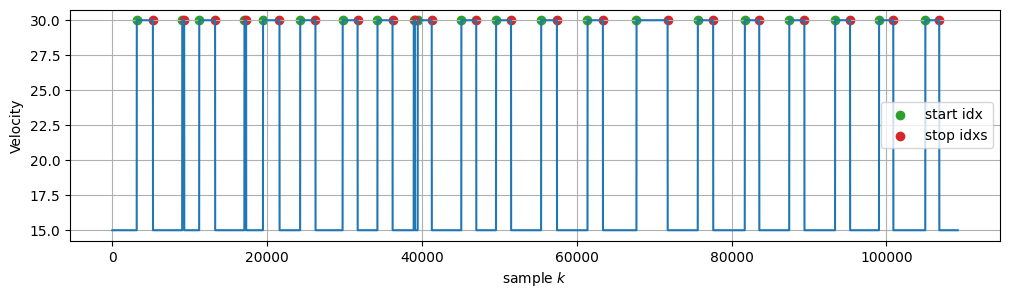

In [5]:
isoforce_iso = IsoforceIso(DF)
isoforce_iso.plot_torque()
isoforce_iso.plot_angle()
isoforce_iso.plot_velocity()

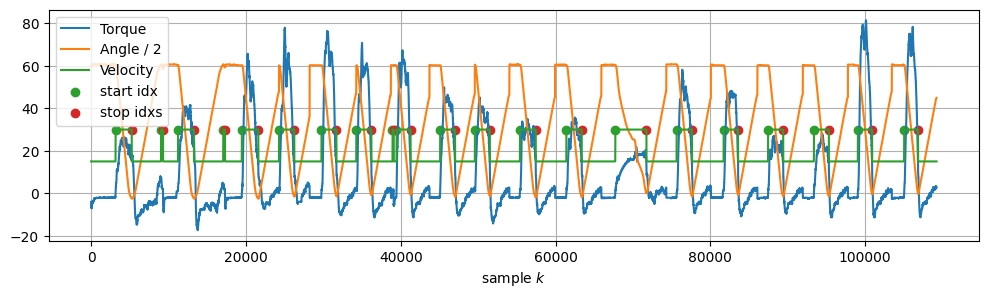

In [6]:
isoforce_iso.plot_data()

20.0
4.0
31.0
3.0
40.0
45.0
51.0
45.0
1.0
48.0
36.0
32.0
26.0
25.0
14.0
37.0
38.0
20.0
19.0
56.0
52.0


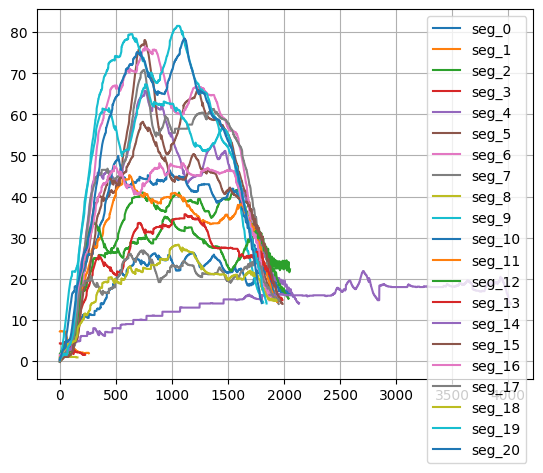

In [7]:
for key in isoforce_iso.torque_segments.keys():
    plt.plot(isoforce_iso.torque_segments[key], label=key)
    print(np.round(np.mean(isoforce_iso.torque_segments[key])))
plt.legend()
plt.grid()
plt.show()

**EIT Sciospec raw**

In [8]:
part_path.print_info()

Fund participant data:

Head directory: self.path='measurements/Participant_test1/'
Raw Isoforce data measured by Isoforce:
	self.isoforce_iso='measurements/Participant_test1/Test_1_JO_raw_data_10012025154959.txt'
Raw Isoforce data measured by Python:
	self.isoforce_py_raw='measurements/Participant_test1/Isokinetic_raw/'
Raw sciospec EIT data:
	self.sciospec_EIT_raw='measurements/Participant_test1/EIT_raw/'
Raw sciospec EIT samples:
	self.EIT_samples_raw='measurements/Participant_test1/EIT_raw/20250113 09.24.18/setup/'
Preprocessed sciospec EIT samples:
	self.s_path_eit='measurements/Participant_test1/EIT_processed/'


In [9]:
try:
    os.mkdir(part_path.s_path_eit)
    process_sciospec_eit(part_path)
except BaseException:
    print("Directory already exists.")

Directory already exists.


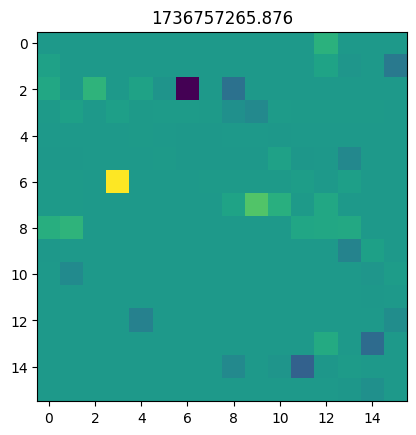

In [11]:
tmp = np.load(part_path.s_path_eit + "setup_00002.npz", allow_pickle=True)
tmp_2 = np.load(part_path.s_path_eit + "setup_00003.npz", allow_pickle=True)
tmp.files

plt.title(tmp["timestamp"])
plt.imshow(tmp["eit"].real - tmp_2["eit"].real)
plt.show()

**Isoforce Python raw**

In [11]:
part_path.isoforce_py_raw

'measurements/Participant_test1/Isokinetic_raw/'

In [42]:
isoforce_py_files = np.sort(glob(part_path.isoforce_py_raw + "*.npz"))

In [43]:
isoforce_py_files

array(['measurements/Participant_test1/Isokinetic_raw/Participant_test1_NI_data_2025-01-13_09-24-05_0.npz',
       'measurements/Participant_test1/Isokinetic_raw/Participant_test1_NI_data_2025-01-13_09-24-05_1.npz',
       'measurements/Participant_test1/Isokinetic_raw/Participant_test1_NI_data_2025-01-13_09-24-05_10.npz',
       'measurements/Participant_test1/Isokinetic_raw/Participant_test1_NI_data_2025-01-13_09-24-05_100.npz',
       'measurements/Participant_test1/Isokinetic_raw/Participant_test1_NI_data_2025-01-13_09-24-05_101.npz',
       'measurements/Participant_test1/Isokinetic_raw/Participant_test1_NI_data_2025-01-13_09-24-05_102.npz',
       'measurements/Participant_test1/Isokinetic_raw/Participant_test1_NI_data_2025-01-13_09-24-05_103.npz',
       'measurements/Participant_test1/Isokinetic_raw/Participant_test1_NI_data_2025-01-13_09-24-05_104.npz',
       'measurements/Participant_test1/Isokinetic_raw/Participant_test1_NI_data_2025-01-13_09-24-05_105.npz',
       'measure

In [36]:
Ch_1 = list()
Ch_2 = list()
Ch_3 = list()

for fls in isoforce_py_files:
    tmp = np.load(fls, allow_pickle=True)
    ch1, ch2, ch3 = tmp["data"]
    Ch_1.append(ch1)
    Ch_2.append(ch2)
    Ch_3.append(ch3)

Ch_1 = np.concatenate(Ch_1)
Ch_2 = np.concatenate(Ch_2)
Ch_3 = np.concatenate(Ch_3)

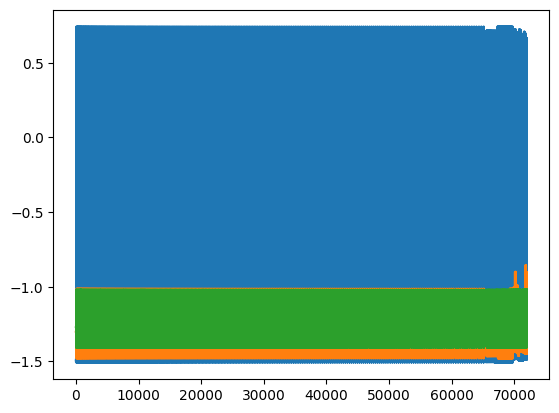

In [39]:
plt.plot(Ch_1[::100])
plt.plot(Ch_2[::100])
plt.plot(Ch_3[::100])